In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

import addict
import copy
import scipy
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import celeri

plt.rcParams["text.usetex"] = False

In [2]:
def greatcircleaz(lat1, lon1, lat2, lon2):
    # Inputs lat1, lon1, lat2, lon2 are in units of radians.
    azimuth = np.arctan2(
        np.cos(np.deg2rad(lat2)) * np.sin(np.deg2rad(lon2) - np.deg2rad(lon1)),
        np.cos(np.deg2rad(lat1)) * np.sin(np.deg2rad(lat2))
        - np.sin(np.deg2rad(lat1))
        * np.cos(np.deg2rad(lat2))
        * np.cos(np.deg2rad(lon2) - np.deg2rad(lon1)),
    )
    return np.rad2deg(azimuth)


def plot_azimuths(segment, lon_range, lat_range):
    for i in range(len(segment)):
        if segment.azimuth[i] >= 0.0:
            plt.plot(
                [segment.lon1[i], segment.lon2[i]],
                [segment.lat1[i], segment.lat2[i]],
                "-k",
                linewidth=0.5,
            )
        else:
            plt.plot(
                [segment.lon1[i], segment.lon2[i]],
                [segment.lat1[i], segment.lat2[i]],
                "-r",
                linewidth=5,
            )
    plt.xlim([lon_range[0], lon_range[1]])
    plt.ylim([lat_range[0], lat_range[1]])
    plt.gca().set_aspect("equal", adjustable="box")

# 1. Japan azimuth comparision

In [3]:
COMMAND_FILE_NAME_WNA = "../data/command/western_north_america_command.json"
COMMAND_FILE_NAME_JAPAN = "../data/command/japan_command.json"
command_japan = celeri.get_command(COMMAND_FILE_NAME_JAPAN)
segment_japan, block_japan, meshes_japan, station_japan, mogi_japan, sar_japan = (
    celeri.read_data(command_japan)
)
segment_japan = celeri.process_segment(segment_japan, command_japan, meshes_japan)
azimuth_japan = greatcircleaz(
    segment_japan.lat1, segment_japan.lon1, segment_japan.lat2, segment_japan.lon2
)

2024-06-27 22:13:14.066 | INFO     | celeri.celeri:read_data:136 - Reading data files
2024-06-27 22:13:14.070 | SUCCESS  | celeri.celeri:read_data:140 - Read: ../data/segment/japan_segment.csv
2024-06-27 22:13:14.072 | SUCCESS  | celeri.celeri:read_data:145 - Read: ../data/block/japan_block.csv
2024-06-27 22:13:14.073 | SUCCESS  | celeri.celeri:read_data:152 - Read: ../data/mesh/japan_mesh_parameters.json


Warning: The file contains tag data that couldn't be processed.

2024-06-27 22:13:14.096 | SUCCESS  | celeri.celeri:read_data:299 - Read: ../data/mesh/nankai.msh


Warning: The file contains tag data that couldn't be processed.

2024-06-27 22:13:14.129 | SUCCESS  | celeri.celeri:read_data:299 - Read: ../data/mesh/japan.msh


Warning: The file contains tag data that couldn't be processed.

2024-06-27 22:13:14.157 | SUCCESS  | celeri.celeri:read_data:299 - Read: ../data/mesh/sagami.msh
2024-06-27 22:13:14.160 | SUCCESS  | celeri.celeri:read_data:335 - Read: ../data/station/japan_station.csv
2024-06-27 22:13:14.161 | INFO     | celeri.celeri:read_data:350 - No mogi_file_name
2024-06-27 22:13:14.161 | INFO     | celeri.celeri:read_data:372 - No sar_file_name


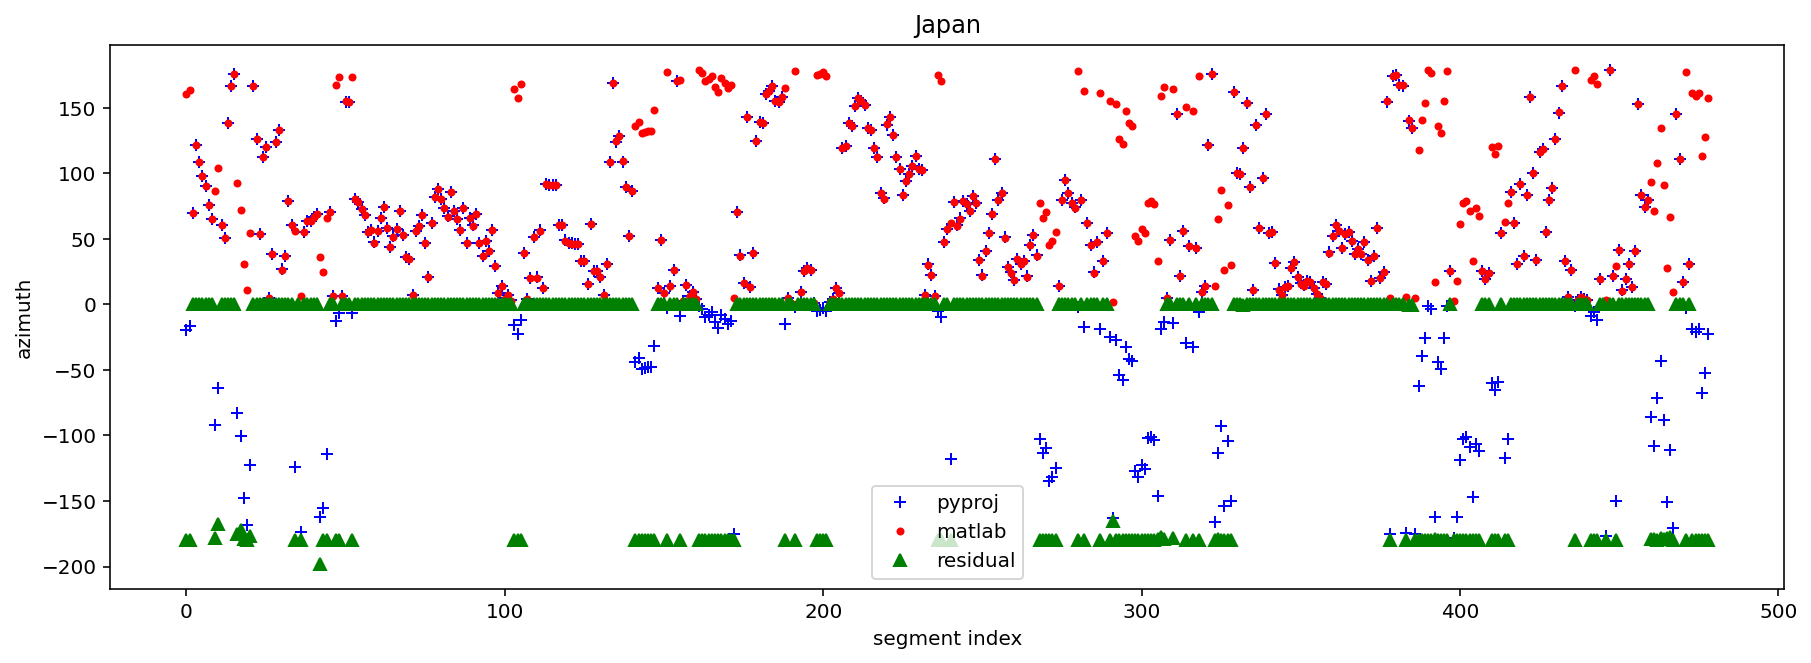

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(segment_japan.azimuth, "b+", label="pyproj")
plt.plot(azimuth_japan, "r.", label="matlab")
plt.plot(segment_japan.azimuth - azimuth_japan, "g^", label="residual")
plt.title("Japan")
plt.xlabel("segment index")
plt.ylabel("azimuth")
plt.legend()
plt.show()

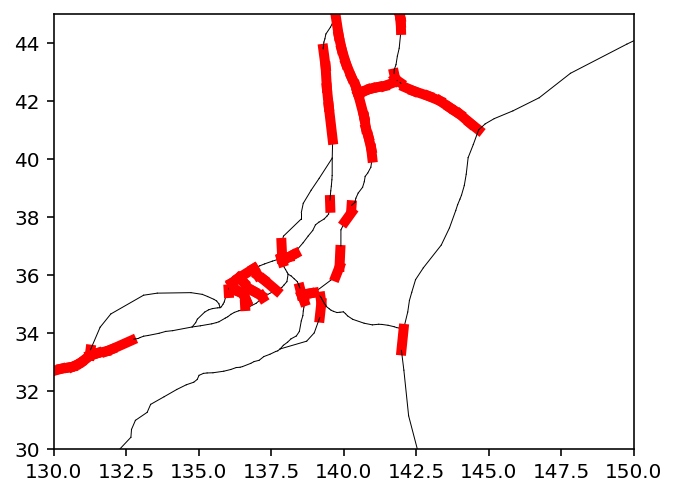

In [5]:
plot_azimuths(segment_japan, command_japan.lon_range, command_japan.lat_range)

# 2. Western North Americal azimuth comparision

In [6]:
COMMAND_FILE_NAME_WNA = "../data/command/western_north_america_command.json"
# COMMAND_FILE_NAME_WNA = "../data/command/anatolia_command.json"
command_wna = celeri.get_command(COMMAND_FILE_NAME_WNA)
segment_wna, block_wna, meshes_wna, station_wna, mogi_wna, sar_wna = celeri.read_data(
    command_wna
)
segment_wna = celeri.process_segment(segment_wna, command_wna, meshes_wna)
azimuth_wna = greatcircleaz(
    segment_wna.lat1, segment_wna.lon1, segment_wna.lat2, segment_wna.lon2
)

2024-06-27 22:13:14.816 | INFO     | celeri.celeri:read_data:136 - Reading data files
2024-06-27 22:13:14.820 | SUCCESS  | celeri.celeri:read_data:140 - Read: ../data/segment/western_north_america_segment.csv
2024-06-27 22:13:14.821 | SUCCESS  | celeri.celeri:read_data:145 - Read: ../data/block/western_north_america_block.csv
2024-06-27 22:13:14.822 | SUCCESS  | celeri.celeri:read_data:152 - Read: ../data/mesh/western_north_america_mesh_parameters.json


Warning: The file contains tag data that couldn't be processed.

2024-06-27 22:13:14.846 | SUCCESS  | celeri.celeri:read_data:299 - Read: ../data/mesh/cascadia.msh
2024-06-27 22:13:14.894 | SUCCESS  | celeri.celeri:read_data:335 - Read: ../data/station/western_north_america_station.csv
2024-06-27 22:13:14.897 | INFO     | celeri.celeri:read_data:350 - No mogi_file_name
2024-06-27 22:13:14.948 | INFO     | celeri.celeri:read_data:372 - No sar_file_name


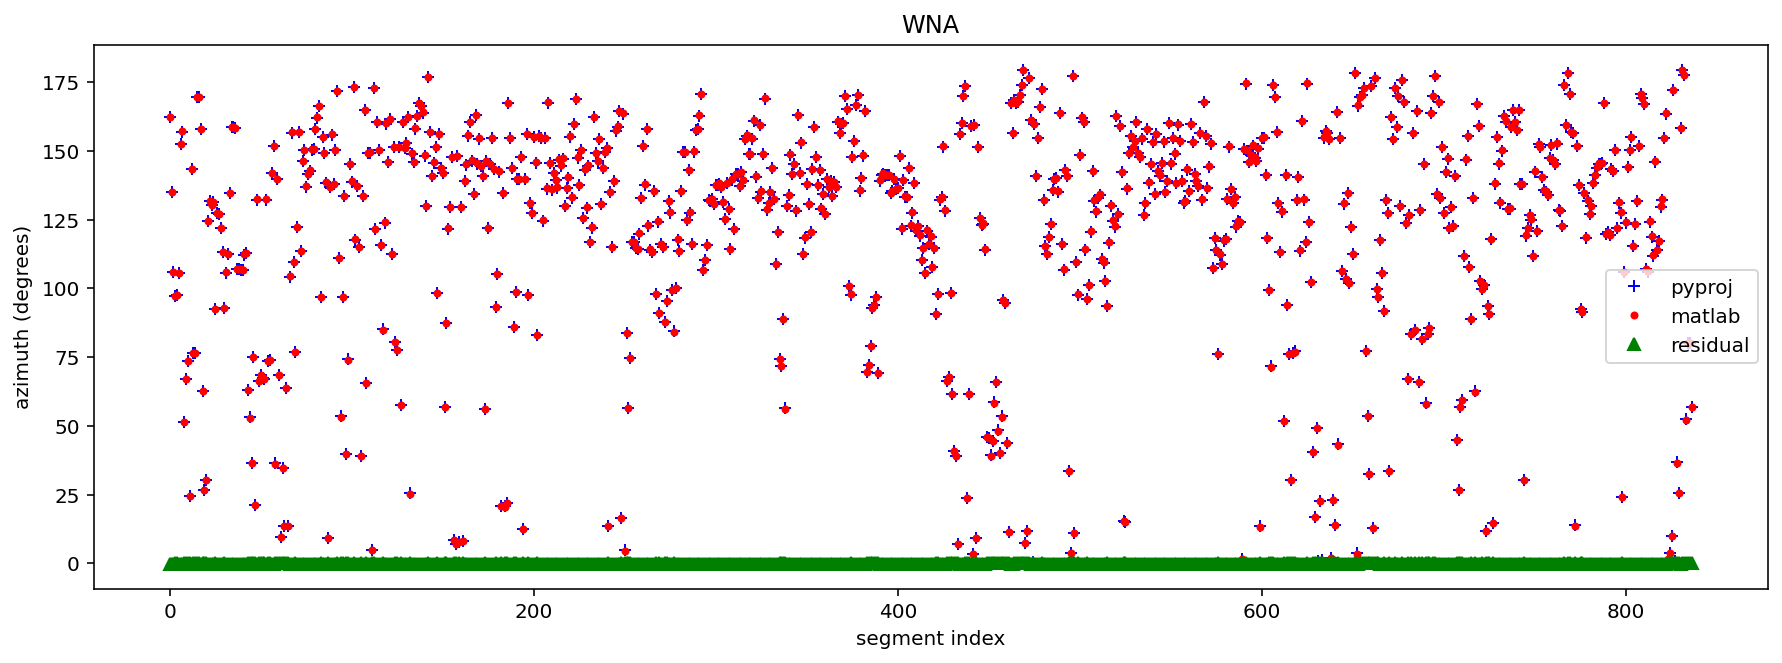

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(segment_wna.azimuth, "b+", label="pyproj")
plt.plot(azimuth_wna, "r.", label="matlab")
plt.plot(segment_wna.azimuth - azimuth_wna, "g^", label="residual")
plt.title("WNA")
plt.xlabel("segment index")
plt.ylabel("azimuth (degrees)")
plt.legend()
plt.show()

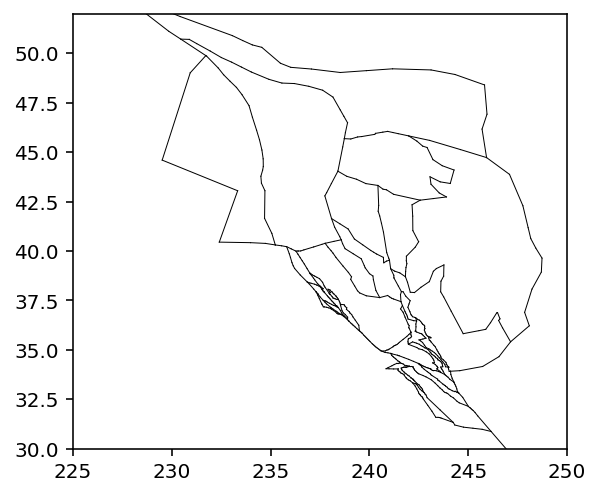

In [8]:
plot_azimuths(segment_wna, command_wna.lon_range, command_wna.lat_range)

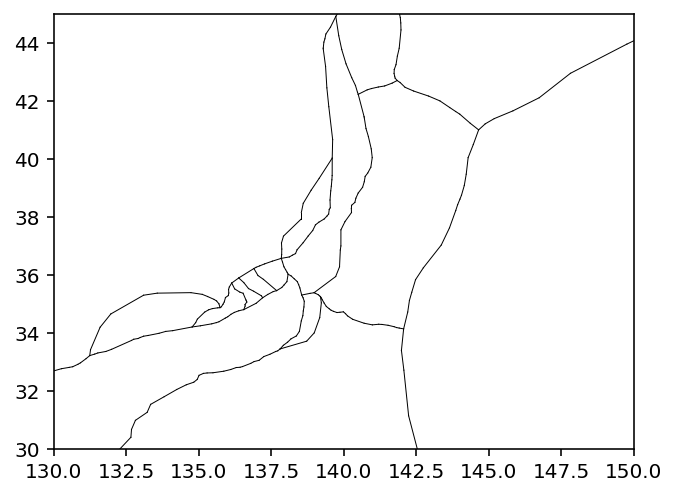

In [9]:
def plot_stuff(segment, lon_range, lat_range):
    for i in range(len(segment)):
        if segment.lon1[i] <= segment.lon2[i]:
            plt.plot(
                [segment.lon1[i], segment.lon2[i]],
                [segment.lat1[i], segment.lat2[i]],
                "-k",
                linewidth=0.5,
            )
        else:
            plt.plot(
                [segment.lon1[i], segment.lon2[i]],
                [segment.lat1[i], segment.lat2[i]],
                "-r",
                linewidth=5,
            )
    plt.xlim([lon_range[0], lon_range[1]])
    plt.ylim([lat_range[0], lat_range[1]])
    plt.gca().set_aspect("equal", adjustable="box")


segment_japan = celeri.process_segment(segment_japan, command_japan, meshes_japan)
plot_azimuths(segment_japan, command_japan.lon_range, command_japan.lat_range)

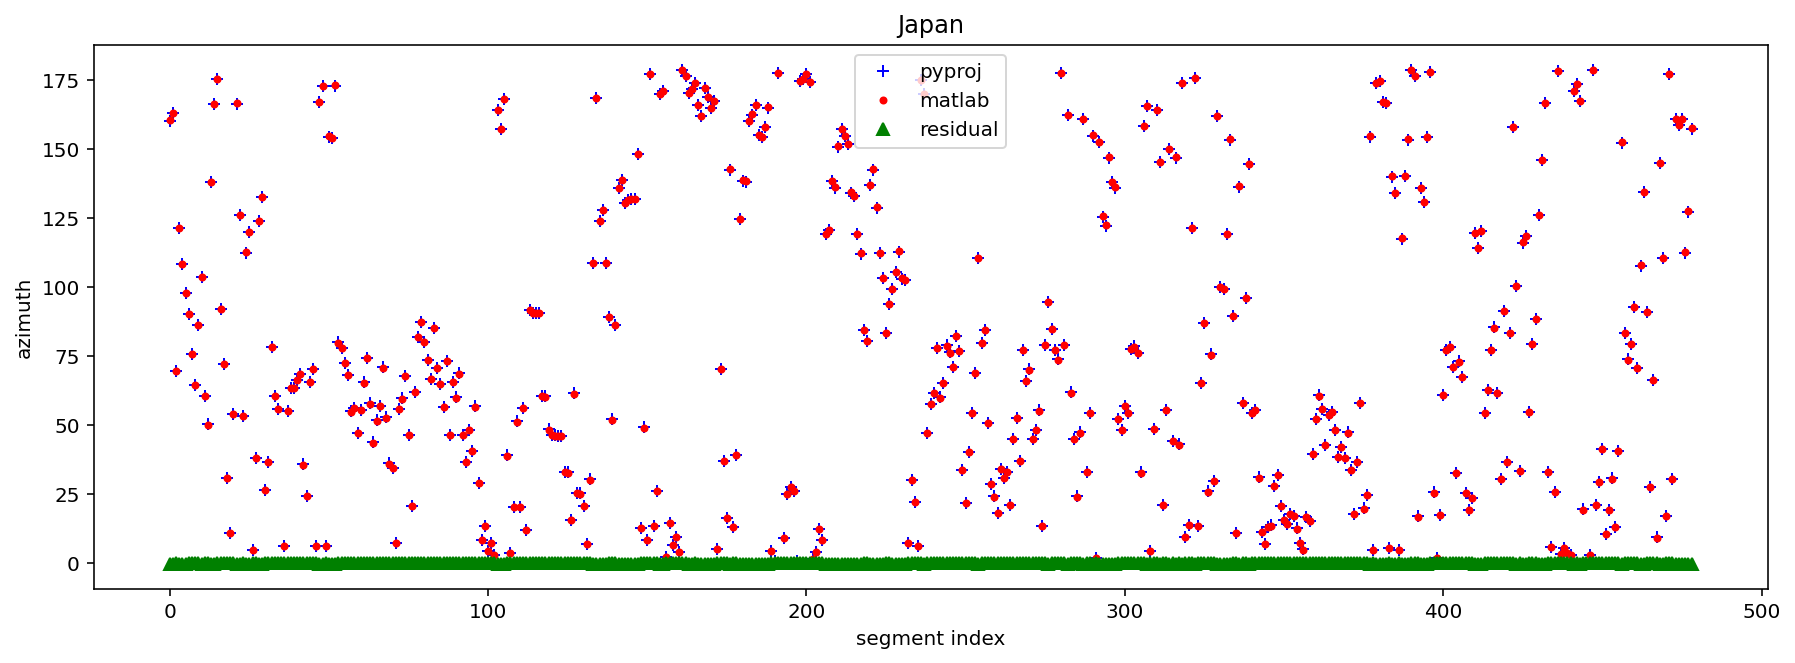

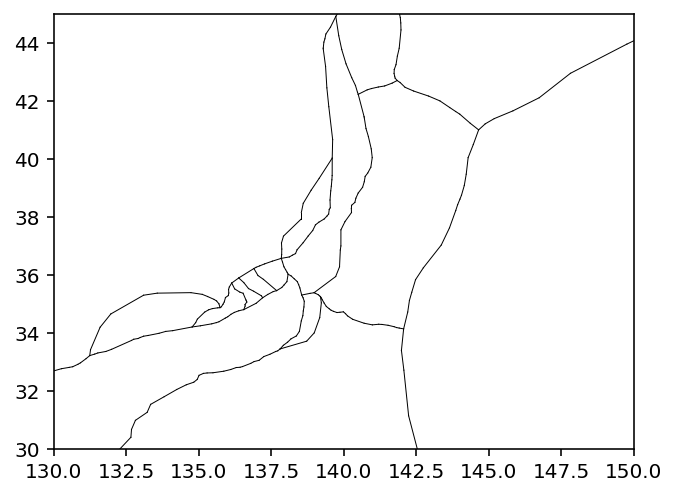

In [10]:
segment_japan = celeri.process_segment(segment_japan, command_japan, meshes_japan)

plt.figure(figsize=(15, 5))
plt.plot(segment_japan.azimuth, "b+", label="pyproj")
plt.plot(azimuth_japan, "r.", label="matlab")
plt.plot(segment_japan.azimuth - azimuth_japan, "g^", label="residual")
plt.title("Japan")
plt.xlabel("segment index")
plt.ylabel("azimuth")
plt.legend()
plt.show()

plot_azimuths(segment_japan, command_japan.lon_range, command_japan.lat_range)